In [1]:
import tensorflow as tf
from keras import models
import numpy as np
import pandas as pd

### Tính phổ từ ảnh chụp

In [2]:
def Image(file_name, min_x, max_x, min_y, max_y):
    global data
    
    #upload image
    img = tf.keras.preprocessing.image.load_img(
        name_file, grayscale=False, color_mode="grayscale")
    
    # Chuyển hình ảnh thành mảng col*row với giá trị nằm trong khoảng [0, 255]
    # Giá trị đồ thị( màu đen) nằm trong khoảng (1, 200)
    # Giá trị của phần nền(màu trắng) nằm trong khoảng (200, 255)
    array = tf.keras.utils.img_to_array(img)
    
    col = len(array[:, 0]) #collom of array
    row = len(array[0, :]) #row of array
    
    arr = array[:, :, 0]
    arr = arr.reshape(col, row)
    
#------------------------------------------------------------------------------ 

    #cắt khoảng trằng bên phải( xóa row)
    count = [None]*row
    white = np.arange(200, 256, 1)
    k1 = 0
    while(k1<row):
        count[k1] = 0
        for j in range(0, col, 1):
            if any(arr[j, -1] == num for num in white):
                count[k1] += 1
                if(count[k1] == int(2*col/3)):
                    arr = np.delete(arr, -1, axis=1)
                    #print(k1)
                    break

        if(count[k1]<int(col/3)):
            break

        k1 = k1+1

    # Xóa trục
    for i in range(0, 2, 1):
        arr = np.delete(arr, -1, axis=1)

    row = len(arr[0, :]) # cập nhật lại số cột
    
#------------------------------------------------------------------------------  

    #cắt khoảng trằng phía trên( xóa collums)
    count = [None]*row
    white = np.arange(200, 256, 1)
    k2 = 0
    while(k2<col):
        count[k2] = 0
        for j in range(0, row, 1):
            if any(arr[0, j] == num for num in white):
                count[k2] += 1
                if(count[k2] == int(2*row/3)):
                    arr = np.delete(arr, 0, axis=0)
                    #print(k2)
                    break

        if(count[k2]<int(row/3)):
            break

        k2 = k2+1

    # Xóa trục
    for i in range(0, 2, 1):
        arr = np.delete(arr, 0, axis=0)

    col = len(arr[:, 0]) # cập nhật lại số hàng
    
#------------------------------------------------------------------------------  
    
    #cắt khoảng trằng phía dưới( xóa collums)
    k3 = 0
    while(k3<col):
        count[k3] = 0
        for j in range(0, row, 1):
            if any(arr[-1, j] == num for num in white):
                count[k3] += 1
                if(count[k3] == int(2*row/3)):
                    arr = np.delete(arr, -1, axis=0)
                    #print(k3)
                    break

        if(count[k3]<int(row/3)):
            break

        k3 = k3+1

    # Xóa trục
    for i in range(0, 2, 1):
        arr = np.delete(arr, -1, axis=0)

    col = len(arr[:, 0]) # cập nhật lại số hàng

#------------------------------------------------------------------------------  

    #cắt khoảng trằng phía bên trái( xóa row_cột)
    count = [None]*row
    white = np.arange(200, 256, 1)
    
    k4 = 0
    while(k4<row):
        count[k4] = 0
        for j in range(0, col, 1):
            if any(arr[j, 0] == num for num in white):
                count[k4] += 1
                if(count[k4] == 100):
                    arr = np.delete(arr, 0, axis=1)
                    #print(k4)
                    break

        if(count[k4]<int(col/3)):
            break

        k4 = k4+1
    # Xóa trục
    for i in range(0, 2, 1):
        arr = np.delete(arr, 0, axis=1)

    row = len(arr[0, :]) # cập nhật lại số cột
    
#------------------------------------------------------------------------------  
 #Tính phổ tương ứng với bước sóng/năng lượng
    eV = []
    q = []
    black = np.arange(0, 200, 1)
    for index_row in range(0, row, 1):
        for index_col in range(col-1, -1, -1):
            if any(arr[index_col, index_row] == num for num in black):
                k = index_col
                break

        if(arr[index_col, index_row]<150):
            eV = eV + [min_x + (index_row/row)*(max_x - min_x)]
            q = q + [min_y + ((col - k)/col)*(max_y - min_y)]
    x = np.array([eV]) .T
    y = np.array([q]).T
    data = np.concatenate((x, y),axis = 1)
    print(data)

### Nhập các giá trị đầu vào
#### + Nhập tên file ảnh
#### + Nhập khoảng bước sóng/năng lượng 
#### + Nhập khoảng giá trị của phổ

In [3]:
print("Upload your file image")
name_file = input("name_file = ") #screenshot_1682134130.png

print("Nhap gia tri nho nhat cua buoc song/nang luong: ") #0
min_x = float(input("min_x = "))

print("Nhap gia tri lon nhat cua buoc song/nang luong: ") #5
max_x = float(input("max_x = "))

print("Nhap gia tri nho nhat cua pho ") # 0
min_y = float(input("min_y = "))

print("Nhap gia tri lon nhat cua pho ") #2231.94
max_y = float(input("max_y = "))

Image(name_file, min_x, max_x, min_y, max_y)

Upload your file image
name_file = screenshot_1682134130.png
Nhap gia tri nho nhat cua buoc song/nang luong: 
min_x = 0
Nhap gia tri lon nhat cua buoc song/nang luong: 
max_x = 5
Nhap gia tri nho nhat cua pho 
min_y = 0
Nhap gia tri lon nhat cua pho 
max_y = 2231.94
[[4.57317073e-01 8.82189723e+00]
 [4.72560976e-01 8.82189723e+00]
 [4.87804878e-01 8.82189723e+00]
 [5.03048780e-01 8.82189723e+00]
 [5.18292683e-01 8.82189723e+00]
 [5.33536585e-01 8.82189723e+00]
 [5.48780488e-01 8.82189723e+00]
 [5.64024390e-01 8.82189723e+00]
 [5.79268293e-01 8.82189723e+00]
 [5.94512195e-01 8.82189723e+00]
 [6.09756098e-01 8.82189723e+00]
 [6.25000000e-01 8.82189723e+00]
 [6.40243902e-01 8.82189723e+00]
 [6.55487805e-01 8.82189723e+00]
 [6.70731707e-01 8.82189723e+00]
 [6.85975610e-01 8.82189723e+00]
 [7.01219512e-01 8.82189723e+00]
 [7.16463415e-01 8.82189723e+00]
 [7.31707317e-01 8.82189723e+00]
 [7.46951220e-01 8.82189723e+00]
 [7.62195122e-01 8.82189723e+00]
 [7.77439024e-01 8.82189723e+00]
 [7.926

<Figure size 1800x1200 with 0 Axes>

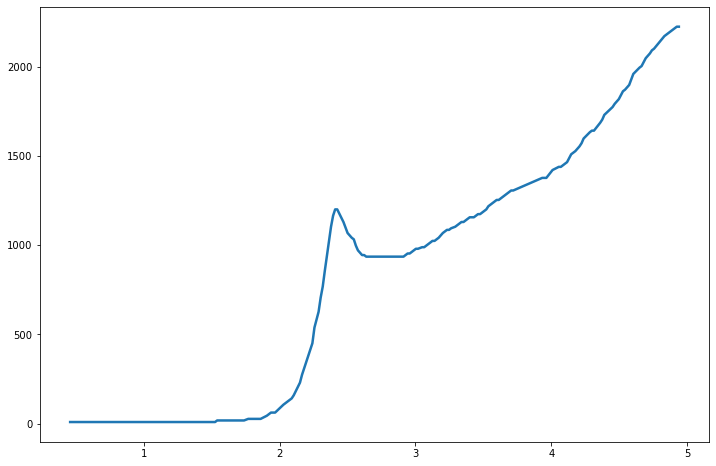

In [4]:
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
plt.figure(figsize=(12, 8))
plt.plot(data[:, 0], data[:, 1], linewidth = 2.5)

### Đánh giá độ chính xác, sai số

In [5]:
e = np.array(data[:, 0]) #năng lượng
q = np.array(data[:, 1]) #phổ
N  = len(e)
N

209

In [6]:
from scipy import interpolate

In [7]:
# Mie light scattering by a single sphere: Extinction cross section
#(V. Myroshnychenko et al., Chem. Soc. Rev. 37, 1792 (2008).)
au = pd.read_csv("gold 20nm.csv")
au

,eV,Extinction
0,0.500,1.248336
1,0.523,1.290452
2,0.545,1.335133
3,0.568,1.382696
4,0.590,1.433375
...,...,...
195,4.910,2188.895229
196,4.932,2199.572473
197,4.955,2209.737548
198,4.977,2219.378319


In [8]:
au = np.array(au)
au.shape

(200, 2)

In [9]:
Ext = np.array(au[:, 1])
eV = np.array(au[:, 0])
Ext

array([1.24833620e+00, 1.29045190e+00, 1.33513270e+00, 1.38269620e+00,
       1.43337510e+00, 1.48721150e+00, 1.54507830e+00, 1.60653180e+00,
       1.67177380e+00, 1.74131160e+00, 1.81539090e+00, 1.89424400e+00,
       1.97789180e+00, 2.06697880e+00, 2.16177160e+00, 2.26218450e+00,
       2.36945400e+00, 2.48316270e+00, 2.60421140e+00, 2.73261700e+00,
       2.86972750e+00, 3.01504120e+00, 3.16973660e+00, 3.33445480e+00,
       3.50947310e+00, 3.69570490e+00, 3.89468710e+00, 4.10572110e+00,
       4.33115920e+00, 4.55118790e+00, 4.77400780e+00, 5.00748950e+00,
       5.25230940e+00, 5.50913030e+00, 5.76288240e+00, 6.00081210e+00,
       6.24517140e+00, 6.49545060e+00, 6.75083000e+00, 7.01005130e+00,
       7.39684430e+00, 7.88707520e+00, 8.42298600e+00, 9.01150290e+00,
       9.66107610e+00, 1.03169691e+01, 1.08970134e+01, 1.15215674e+01,
       1.21961899e+01, 1.29274637e+01, 1.37232455e+01, 1.45806231e+01,
       1.55065469e+01, 1.65186434e+01, 1.76297297e+01, 1.88553534e+01,
      

In [10]:
#e = e[20: N]
q_interpolate = interpolate.interp1d(eV, Ext, kind='cubic')
Extinction = q_interpolate(e[20:N])
Extinction                    

array([1.94379255e+00, 2.00274972e+00, 2.06180869e+00, 2.12308769e+00,
       2.18932386e+00, 2.25949154e+00, 2.32957684e+00, 2.40415773e+00,
       2.48393308e+00, 2.56395192e+00, 2.64529597e+00, 2.73188909e+00,
       2.82639849e+00, 2.92170360e+00, 3.01911473e+00, 3.12564125e+00,
       3.23467178e+00, 3.34421798e+00, 3.45861978e+00, 3.58266796e+00,
       3.71359247e+00, 3.84522747e+00, 3.97928873e+00, 4.12373204e+00,
       4.28097483e+00, 4.43044519e+00, 4.57606647e+00, 4.73074156e+00,
       4.88598400e+00, 5.04096379e+00, 5.20226637e+00, 5.37734760e+00,
       5.55465463e+00, 5.72221857e+00, 5.88740251e+00, 6.05143644e+00,
       6.21318640e+00, 6.37548505e+00, 6.54735491e+00, 6.72531842e+00,
       6.88985780e+00, 7.08307133e+00, 7.34576108e+00, 7.67313731e+00,
       8.02203791e+00, 8.37784864e+00, 8.77457909e+00, 9.19748338e+00,
       9.62955379e+00, 1.00685473e+01, 1.04894031e+01, 1.08874979e+01,
       1.12925259e+01, 1.17334497e+01, 1.22076876e+01, 1.26890426e+01,
      

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error : %f" %mean_squared_error(Extinction, q[20:N]))
print("R2 score : %f %%" %(100*r2_score(Extinction, q[20: N])))

Mean squared error : 480.101617
R2 score : 99.901290 %


<Figure size 1800x1200 with 0 Axes>

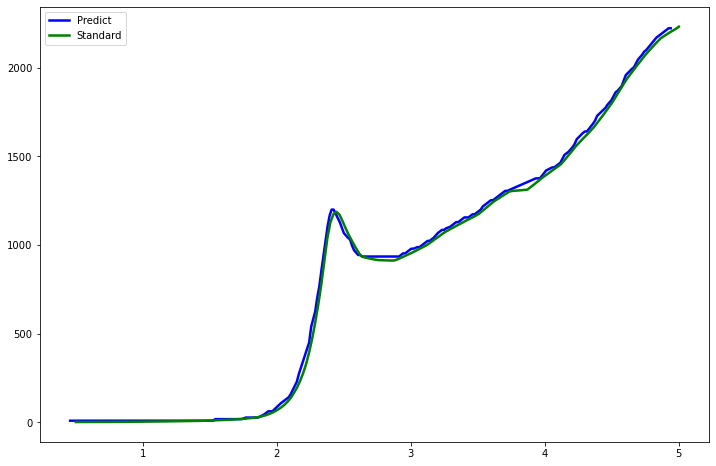

In [12]:
from numpy import pi
plt.figure(dpi = 300)
plt.figure(figsize=(12, 8))
plt.plot(e, q, linewidth = 2.5 ,color='b', label='Predict')
plt.plot(eV, Ext, linewidth = 2.5, color='g', label='Standard');
plt.legend()